In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
pwd

'/Users/dimas/Documents/data-science'

# Introduction :

The datasets is mainly about crowdfunding on each projects taken between {'1970-01-01' - '2018-01-01'}. 
Most of the projects that is shown on the datasets is based from entertainment section (such as art, comics, crafts, music, games, photography, film & video, etc.)

Crowdfunding is the practice of funding a project or venture by raising small amounts of money from a large number of people, typically via the Internet.

Funding is the act of providing resources to finance a need, program, or project. In this case, mainly focused on projects.

Pledge is the amount that is given from the funding ex: pledge is USD 100, meaning that the project is supported with USD 100 fund.

# First, we review the first projects first (2018 version)

In [4]:
df =pd.read_csv('ks-projects-201801.csv')
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [5]:
df['launched'].min(), df['launched'].max() # Used for introduction.

('1970-01-01 01:00:00', '2018-01-02 15:02:31')

# Data Cleaning & Exploration :

In [6]:
maincategory = df['main_category'].value_counts()
maincategory

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

<AxesSubplot:>

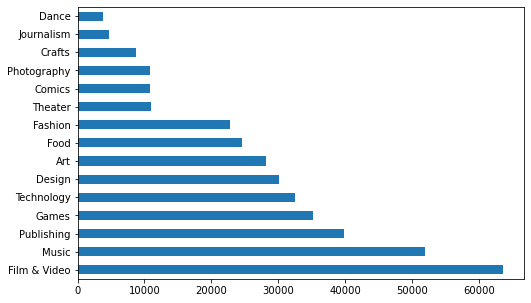

In [7]:
maincategory.plot.barh(maincategory, figsize=(8,5))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [9]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [10]:
df.isnull().any()

ID                  False
name                 True
category            False
main_category       False
currency            False
deadline            False
goal                False
launched            False
pledged             False
state               False
backers             False
country             False
usd pledged          True
usd_pledged_real    False
usd_goal_real       False
dtype: bool

Decided to drop the NaN values,
since if name has null values, it cannot be used since it is a primary variable.
usd pledged has null values, we could take it as null on usd pledged could be meant as 0 (no pledge is taken), but since at the dataframe has values '0', it is taken that null values on usd pledged has no values in it.

In [11]:
df.dropna()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


# Counting how many currency is used :
It is given that USD has the most currency used on funding a projects.

The ranked can be given above below.

In [12]:
currency = df['currency'].value_counts()
currency

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

<AxesSubplot:>

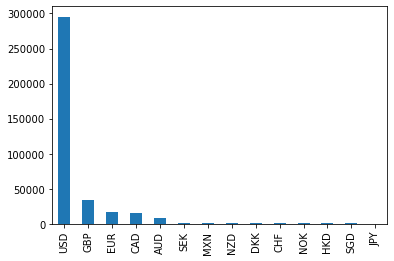

In [13]:
currency.plot.bar()

In [14]:
currencypercentage = (df['currency'].value_counts(normalize=True) * 100).round(1)
currencypercentage = currencypercentage.astype(str) + '%'
currencypercentage

USD    78.0%
GBP     9.0%
EUR     4.6%
CAD     4.0%
AUD     2.1%
SEK     0.5%
MXN     0.5%
NZD     0.4%
DKK     0.3%
CHF     0.2%
NOK     0.2%
HKD     0.2%
SGD     0.1%
JPY     0.0%
Name: currency, dtype: object

In [15]:
df1 = df[['currency', 'usd pledged']]
df1

,currency,usd pledged
0,GBP,0.0
1,USD,100.0
2,USD,220.0
3,USD,1.0
4,USD,1283.0
...,...,...
378656,USD,25.0
378657,USD,155.0
378658,USD,20.0
378659,USD,200.0


# Comparing the pledge based on their currencies if there is any differences :
- From this analysis, I decided to use the pledged, I decided to use 'usd pledged' since it is already converted to USD currencies so it is easier to analyze and taking conclusion.

In [16]:
df1othercurren = df1.loc[(df1['currency'] != 'USD') & (df1['usd pledged'] != 0)]

In [17]:
df1currenUSD= df1.loc[(df1['currency'] == 'USD') & (df1['usd pledged'] != 0)]

In [18]:
df1currency = [df1othercurren, df1currenUSD]
df1currency

[       currency  usd pledged
 14          GBP     57763.78
 23          NOK         6.18
 27          CAD     43203.25
 28          GBP       167.70
 30          GBP        32.42
 ...         ...          ...
 378636      CAD      4814.88
 378642      EUR        66.72
 378645      GBP      4281.15
 378651      CAD      5019.92
 378652      NOK      2698.97
 
 [63845 rows x 2 columns],
        currency  usd pledged
 1           USD        100.0
 2           USD        220.0
 3           USD          1.0
 4           USD       1283.0
 5           USD      52375.0
 ...         ...          ...
 378656      USD         25.0
 378657      USD        155.0
 378658      USD         20.0
 378659      USD        200.0
 378660      USD        524.0
 
 [246704 rows x 2 columns]]

In [19]:
df2= df[['currency', 'pledged']]

In [20]:
df2othercurren = df2.loc[(df2['currency'] != 'USD') & (df2['pledged'] != 0)]

In [21]:
df2currenUSD = df2.loc[(df2['currency'] == 'USD') & (df2['pledged'] != 0)]

In [22]:
df2tot = [df2othercurren, df2currenUSD]
df2tot

[       currency   pledged
 14          GBP  94175.00
 21          AUD      1.00
 23          NOK     48.00
 27          CAD  48905.00
 28          GBP    112.38
 ...         ...       ...
 378636      CAD   5435.00
 378642      EUR   1246.00
 378645      GBP   2738.00
 378651      CAD   5501.00
 378652      NOK  21500.00
 
 [69495 rows x 2 columns],
        currency  pledged
 1           USD   2421.0
 2           USD    220.0
 3           USD      1.0
 4           USD   1283.0
 5           USD  52375.0
 ...         ...      ...
 378656      USD     25.0
 378657      USD    155.0
 378658      USD     20.0
 378659      USD    200.0
 378660      USD    524.0
 
 [256639 rows x 2 columns]]

Comparing 2 columns, usd pledged and the real usd pledged if there is any differences, turns out there is some differences between them.

# Range :
range between the 'usd pledged' and 'usd_pledged_real' ;

In [23]:
dfcompareusd = df['usd pledged'] - df['usd_pledged_real']
dfcompareusd

0            0.0
1        -2321.0
2            0.0
3            0.0
4            0.0
           ...  
378656       0.0
378657       0.0
378658       0.0
378659       0.0
378660       0.0
Length: 378661, dtype: float64

In [24]:
df['launched_year'] = df['launched'].str[:4]

In [25]:
df['launched_year'] = df['launched_year'].astype(str).astype(int)

Creating a new column called pledge_goal_range to find the range between the pledged given and the goal.

NB : same as state which define successful/failed, etc.

Difference; the pledge_goal_range is characterized as numeric variable.

In [26]:
df['pledge_goal_range'] = df['usd pledged'] - df['usd_goal_real']

<AxesSubplot:>

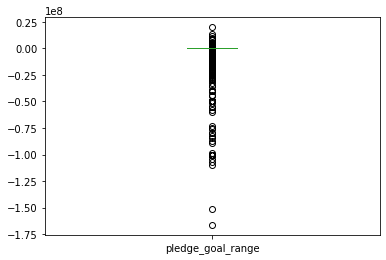

In [27]:
df['pledge_goal_range'].plot.box()

As the boxplot show on the above,
the green line shows that the funding is successful. (meaning that range has 0, goal has been reached.)

Below the green line, shows the projects that has failed to attain their funding goals.

above the green line shows that the funding surpass way more than their goals.

# Comparing the boxplot with the dataframe.

In [28]:
df['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

All the failed is shown below < 0 and the successful is showed as > 0.

In [29]:
pledgegoalrange = df[['pledge_goal_range','state']]
pledgegoalrange

,pledge_goal_range,state
0,-1533.95,failed
1,-29900.00,failed
2,-44780.00,failed
3,-4999.00,failed
4,-18217.00,canceled
...,...,...
378656,-49975.00,canceled
378657,-1345.00,failed
378658,-14980.00,failed
378659,-14800.00,failed


In [30]:
pledgegoalrange.groupby(['pledge_goal_range']).max()

,state
pledge_goal_range,
-1.663614e+08,failed
-1.513959e+08,failed
-1.101698e+08,failed
-1.073699e+08,failed
-1.040572e+08,failed
...,...
9.172056e+06,successful
1.016685e+07,successful
1.177984e+07,successful


# Deleting columns that is not used:

Decided to delete '#' columns because :

- ID : it is not used.

- category : since there is already category (which is more versatile than category variable), decided to use main_category.

- usd_pledged_real : used usd_pledged because it is already clean(taxes,margin,etc).

- pledged : decided to use usd_pledged since it is already converted to usd, so it's easier to analyze and all of the projects has the same values gotten.

- country : used currency to differenciate them, since it has the same things.

- name : grouped them by using main_category.

- deadline : it is not used, it's already stated by 'state' column.

- goal : usd_goal_real is based on USD currency values, since usd_pledged is used, it has no values differences.

In [31]:
del df['ID']
del df['category']
del df['usd_pledged_real']
del df['pledged']
del df['goal']
del df['deadline']
del df['launched']
del df['name']
del df['country']

In [32]:
df

,main_category,currency,state,backers,usd pledged,usd_goal_real,launched_year,pledge_goal_range
0,Publishing,GBP,failed,0,0.0,1533.95,2015,-1533.95
1,Film & Video,USD,failed,15,100.0,30000.00,2017,-29900.00
2,Film & Video,USD,failed,3,220.0,45000.00,2013,-44780.00
3,Music,USD,failed,1,1.0,5000.00,2012,-4999.00
4,Film & Video,USD,canceled,14,1283.0,19500.00,2015,-18217.00
...,...,...,...,...,...,...,...,...
378656,Film & Video,USD,canceled,1,25.0,50000.00,2014,-49975.00
378657,Film & Video,USD,failed,5,155.0,1500.00,2011,-1345.00
378658,Film & Video,USD,failed,1,20.0,15000.00,2010,-14980.00
378659,Technology,USD,failed,6,200.0,15000.00,2016,-14800.00


In [33]:
df['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

More cleaning :
deleted the row on column 'state' until 'successful' and 'failed' is left. (For later use)

In [34]:
new_df = df[(df['state'] != 'canceled') & (df['state'] != 'undefined') & (df['state'] != 'live') & (df['state'] != 'suspended')]
new_df

,main_category,currency,state,backers,usd pledged,usd_goal_real,launched_year,pledge_goal_range
0,Publishing,GBP,failed,0,0.0,1533.95,2015,-1533.95
1,Film & Video,USD,failed,15,100.0,30000.00,2017,-29900.00
2,Film & Video,USD,failed,3,220.0,45000.00,2013,-44780.00
3,Music,USD,failed,1,1.0,5000.00,2012,-4999.00
5,Food,USD,successful,224,52375.0,50000.00,2016,2375.00
...,...,...,...,...,...,...,...,...
378654,Food,USD,failed,4,0.0,6500.00,2017,-6500.00
378657,Film & Video,USD,failed,5,155.0,1500.00,2011,-1345.00
378658,Film & Video,USD,failed,1,20.0,15000.00,2010,-14980.00
378659,Technology,USD,failed,6,200.0,15000.00,2016,-14800.00


In [35]:
new_df[new_df['launched_year'] >= 2014]

,main_category,currency,state,backers,usd pledged,usd_goal_real,launched_year,pledge_goal_range
0,Publishing,GBP,failed,0,0.00,1533.95,2015,-1533.95
1,Film & Video,USD,failed,15,100.00,30000.00,2017,-29900.00
5,Food,USD,successful,224,52375.00,50000.00,2016,2375.00
6,Food,USD,successful,16,1205.00,1000.00,2014,205.00
7,Food,USD,failed,40,453.00,25000.00,2016,-24547.00
...,...,...,...,...,...,...,...,...
378650,Technology,USD,failed,0,0.00,6000.00,2016,-6000.00
378651,Music,CAD,successful,78,5019.92,4529.81,2014,490.11
378652,Film & Video,NOK,successful,36,2698.97,2675.19,2015,23.78
378654,Food,USD,failed,4,0.00,6500.00,2017,-6500.00


In [36]:
new_df['state'].value_counts()

failed        197719
successful    133956
Name: state, dtype: int64

In [37]:
new_df['launched_year'].value_counts()

2015    65272
2014    59306
2016    49292
2017    43419
2013    41101
2012    38480
2011    24049
2010     9577
2009     1179
Name: launched_year, dtype: int64

In [38]:
print(f"Median of the launched year is : {new_df['launched_year'].median()}")

Median of the launched year is : 2014.0


Used the median of the launched year to group them by separating them.

In [39]:
above2014 = new_df.loc[new_df['launched_year'] >= 2014]
above2014

,main_category,currency,state,backers,usd pledged,usd_goal_real,launched_year,pledge_goal_range
0,Publishing,GBP,failed,0,0.00,1533.95,2015,-1533.95
1,Film & Video,USD,failed,15,100.00,30000.00,2017,-29900.00
5,Food,USD,successful,224,52375.00,50000.00,2016,2375.00
6,Food,USD,successful,16,1205.00,1000.00,2014,205.00
7,Food,USD,failed,40,453.00,25000.00,2016,-24547.00
...,...,...,...,...,...,...,...,...
378650,Technology,USD,failed,0,0.00,6000.00,2016,-6000.00
378651,Music,CAD,successful,78,5019.92,4529.81,2014,490.11
378652,Film & Video,NOK,successful,36,2698.97,2675.19,2015,23.78
378654,Food,USD,failed,4,0.00,6500.00,2017,-6500.00


In [40]:
below2014 = new_df.loc[new_df['launched_year'] < 2014]
below2014

,main_category,currency,state,backers,usd pledged,usd_goal_real,launched_year,pledge_goal_range
2,Film & Video,USD,failed,3,220.0,45000.00,2013,-44780.00
3,Music,USD,failed,1,1.0,5000.00,2012,-4999.00
10,Publishing,CAD,failed,0,0.0,2406.39,2013,-2406.39
11,Music,USD,successful,100,12700.0,12500.00,2013,200.00
18,Music,USD,successful,7,250.0,250.00,2012,0.00
...,...,...,...,...,...,...,...,...
378647,Publishing,USD,failed,16,980.0,4999.00,2012,-4019.00
378653,Film & Video,USD,failed,1,25.0,1700.00,2012,-1675.00
378657,Film & Video,USD,failed,5,155.0,1500.00,2011,-1345.00
378658,Film & Video,USD,failed,1,20.0,15000.00,2010,-14980.00


In [41]:
yearabove2014 = 217289
yearbelow2014 = 114386
print(f"Checking if the rows is valid : {yearabove2014 + yearbelow2014}")
new_df.shape

Checking if the rows is valid : 331675


(331675, 8)

# Why it has a different frequency :
As it can be seen above, the year above 2014 has 254553 values in the rows, and the year below 2014 has 124108 values. I suspect because the year 2015 and 2014 holds such a big frequency, causing the datasets to collide in 2014. However, as can be seen above, it still adds up the same rows as the real dataframe. meaning it has no values collided at all.

# Statistics below the year 2014 :

Measure of central tendency below 2014 :

In [42]:
below2014.describe().round(1)

,backers,usd pledged,usd_goal_real,launched_year,pledge_goal_range
count,114386.0,114373.0,114386.0,114386.0,114373.0
mean,106.9,8019.5,18198.3,2012.0,-10180.4
std,850.7,68116.6,227438.5,1.0,232682.5
min,0.0,0.0,0.0,2009.0,-29972416.0
25%,5.0,176.0,2000.0,2011.0,-6000.0
50%,23.0,1331.0,5000.0,2012.0,-489.0
75%,68.0,5041.0,11000.0,2013.0,365.0
max,91585.0,10266845.7,30488734.4,2013.0,10166845.7


In [43]:
print(f"Variance :\n{below2014.var()}")

Variance :
backers              7.237111e+05
usd pledged          4.639877e+09
usd_goal_real        5.172828e+10
launched_year        9.948071e-01
pledge_goal_range    5.414115e+10
dtype: float64


In [44]:
below2014.mode()

,main_category,currency,state,backers,usd pledged,usd_goal_real,launched_year,pledge_goal_range
0,Film & Video,USD,failed,0,0.0,5000.0,2013,0.0


# Statistics above the year 2014 :
Measure of central tendency above 2014 :

In [45]:
above2014.describe().round(1)

,backers,usd pledged,usd_goal_real,launched_year,pledge_goal_range
count,217289.0,217092.0,217289.0,217289.0,217092.0
mean,121.4,7508.1,53781.8,2015.4,-46302.8
std,1020.6,90149.9,1359932.5,1.1,1363230.5
min,0.0,0.0,0.5,2014.0,-166361390.7
25%,2.0,5.0,2000.0,2014.0,-12067.0
50%,10.0,231.0,5940.0,2015.0,-3000.0
75%,59.0,2458.0,18000.0,2016.0,0.0
max,219382.0,20338986.3,166361390.7,2017.0,19838986.3


In [46]:
print(f"Variance :\n{above2014.var()}")

Variance :
backers              1.041655e+06
usd pledged          8.127002e+09
usd_goal_real        1.849416e+12
launched_year        1.174075e+00
pledge_goal_range    1.858398e+12
dtype: float64


In [47]:
above2014.mode()

,main_category,currency,state,backers,usd pledged,usd_goal_real,launched_year,pledge_goal_range
0,Film & Video,USD,failed,0,0.0,5000.0,2015,-5000.0


# Statistics of the overall :

In [48]:
new_df.describe().round(1)

,backers,usd pledged,usd_goal_real,launched_year,pledge_goal_range
count,331675.0,331465.0,331675.0,331675.0,331465.0
mean,116.4,7684.6,41510.0,2014.2,-33838.6
std,965.4,83209.4,1108929.7,1.9,1111812.1
min,0.0,0.0,0.0,2009.0,-166361390.7
25%,2.0,25.0,2000.0,2013.0,-9975.0
50%,15.0,502.0,5000.0,2014.0,-2080.0
75%,63.0,3421.0,15000.0,2016.0,130.0
max,219382.0,20338986.3,166361390.7,2017.0,19838986.3


In [49]:
print("Variance ;")
print(new_df.var())

Variance ;
backers              9.320498e+05
usd pledged          6.923800e+09
usd_goal_real        1.229725e+12
launched_year        3.728461e+00
pledge_goal_range    1.236126e+12
dtype: float64


In [50]:
new_df.mode()

,main_category,currency,state,backers,usd pledged,usd_goal_real,launched_year,pledge_goal_range
0,Film & Video,USD,failed,0,0.0,5000.0,2015,-5000.0


In [51]:
x=new_df['main_category'].value_counts()
x

Film & Video    56527
Music           45949
Publishing      35445
Games           28521
Technology      27050
Art             25641
Design          25364
Food            22054
Fashion         19775
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4149
Dance            3573
Name: main_category, dtype: int64

<AxesSubplot:>

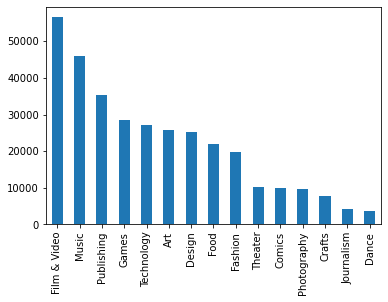

In [52]:
x.plot.bar()

In [53]:
new_df['state'].value_counts()

failed        197719
successful    133956
Name: state, dtype: int64

Finding pearson correlation between :

If there is more backers in a projects, does the probability of having the goals attained has more percentage ?

In [54]:
np.corrcoef(new_df['pledge_goal_range'], new_df['backers'])

array([[nan, nan],
       [nan,  1.]])

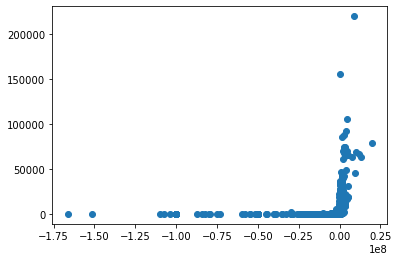

In [55]:
plt.scatter(new_df['pledge_goal_range'], new_df['backers'])

no correlation at all between the 2 variables.

Based on the graphics above, we can state that it has, but it's not either.

In [56]:
new_df['launched_year'].value_counts()

2015    65272
2014    59306
2016    49292
2017    43419
2013    41101
2012    38480
2011    24049
2010     9577
2009     1179
Name: launched_year, dtype: int64

# Distribution Fit :

Binomial Distribution :

Binomial Distribution for column 'state', 2 discrete variable : 'failed' and 'successful'.

Why Binomial Distribution ;
Binomial Distribution is suited for discrete variable and a finite sample(meaning that we know how many sample there is).

In [57]:
new_df['state'].value_counts()

failed        197719
successful    133956
Name: state, dtype: int64

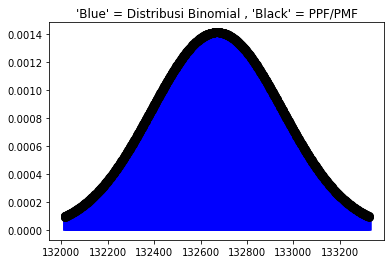

Expected Value : 133956


In [58]:
binfig, binax = plt.subplots(1, 1)

binomn = 331675 # 197719 + 133956 = 331675
binomp = 0.4 # 133956 / 331675 = 0.403877289513388

mean, variance, skew, kurt = stats.binom.stats(binomn,binomp,moments='mvsk') #moments = 'mvsk stands for mean,var,skew,kurt'

# PPF & PMF

binomx = np.arange(stats.binom.ppf(0.01, binomn, binomp), stats.binom.ppf(0.99, binomn, binomp)) #Arranging the probability % from 0.01 to 0.99.
binax.plot(binomx, stats.binom.pmf(binomx, binomn, binomp),'ko', ms=8) # Using PMF, because PMF is mainly used for discrete variable.
binax.vlines(binomx, 0, stats.binom.pmf(binomx, binomn, binomp), colors='b', lw=5, alpha=0.5) # Setting vertical lines.

# Binomial Distribution


plt.title("'Blue' = Distribusi Binomial , 'Black' = PPF/PMF") # NB : Blue is the PPF and PMF, Black is the binomial
plt.show()
print("Expected Value : 133956")

In [59]:
print(mean)
print(variance)
print(skew)
print(kurt)

132670.0
79602.0
0.0007088722996333738
-5.527499309062589e-06


# Confidence Interval :

In [66]:
stats.norm.interval(0.4, loc=7684.6, scale=83209.4)

(-35950.452022128455, 51319.65202212844)

# Hypothesis Testing :

Creating a new columns for the hypothesis.

In [64]:
new_df.describe().transpose().round(1)

,count,mean,std,min,25%,50%,75%,max
backers,331675.0,116.4,965.4,0.0,2.0,15.0,63.0,219382.0
usd pledged,331465.0,7684.6,83209.4,0.0,25.0,502.0,3421.0,20338986.3
usd_goal_real,331675.0,41510.0,1108929.7,0.0,2000.0,5000.0,15000.0,166361390.7
launched_year,331675.0,2014.2,1.9,2009.0,2013.0,2014.0,2016.0,2017.0
pledge_goal_range,331465.0,-33838.6,1111812.1,-166361390.7,-9975.0,-2080.0,130.0,19838986.3


In [ ]:
mean1 = above2014['usd pledged'].mean()
mean1

In [ ]:
above2014['state'].value_counts()

In [ ]:
mean2 = below2014['usd pledged'].mean()
mean2

In [ ]:
below2014['state'].value_counts()

- H0 : above2014 <= below2014

- H1 = above2014 > below2014

Hypothesis Type 1, Type 2 Error :
- True Positive : The year above 2014 gives more total pledged than the year below 2014 and more states were successful.

- True Negative : The year above 2014 gives more total pledged than the year below 2014 but least goals were sucessful.

- False Positive : The year above 2014 gives less total pledged than the year below 2014 but more goals were successful.

- False Negative : The year above 2014 gives less total pledged than the year below 2014 and less goals were successful.

Statistical Testing :

Using T-Test because :
- They have a normal data distribution (Binomial distribution above),
- It is used for testing 2 samples. 

In [ ]:
above2014.describe(include='all').round(1)

In [ ]:
below2014.describe(include='all').round(1)

# T - Test :

In [ ]:
rvs1above = stats.norm.rvs(loc= 7508.1, scale= 90149.9, size= 217289)
rvs2below = stats.norm.rvs(loc= 8019.5, scale= 68116.6, size= 114386)

stats.ttest_ind(rvs1above, rvs2below)

- P-Value = 0.048, accepts Alternative Hypothesis. 